In [2]:
import pandas as pd
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
# import requests

# url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'
# response = requests.get(url)

# with open('../data/yellow_tripdata_2023-02.parquet', 'wb') as file:
#     file.write(response.content)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import mlflow

mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='mlflow-artifacts:/712181732483648708', creation_time=1742965465392, experiment_id='712181732483648708', last_update_time=1742965465392, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [5]:
df_jan = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
df_feb = pd.read_parquet('../data/yellow_tripdata_2023-02.parquet')

In [7]:
df_jan['tpep_pickup_datetime'] = pd.to_datetime(df_jan['tpep_pickup_datetime'])
df_jan['tpep_dropoff_datetime'] = pd.to_datetime(df_jan['tpep_dropoff_datetime'])

In [8]:
df_jan['duration_datetime'] = (df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime'])
df_jan['duration'] = df_jan['duration_datetime'].dt.total_seconds()/60
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_datetime,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [9]:
df_jan = df_jan[(df_jan['duration'] >=1) & (df_jan['duration'] <=60)]
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_datetime,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [10]:
categorical = ["PULocationID", "DOLocationID"]
numerical = ['trip_distance']
df_jan[categorical] = df_jan[categorical].astype(str)
df_jan[categorical].head()

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79


In [11]:
train_dicts = df_jan[categorical+numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df_jan[target].values

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_train)
root_mean_squared_error(y_train,y_pred)

7.658396898909143

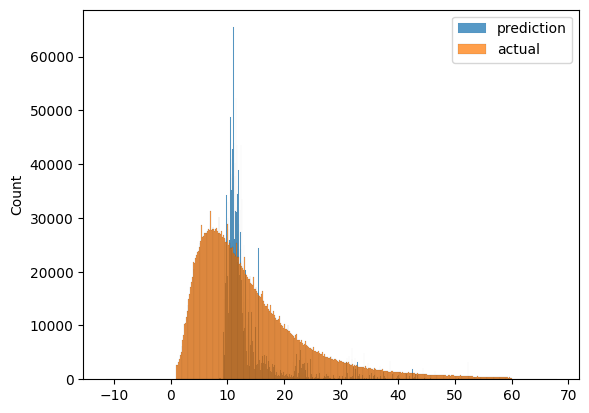

In [13]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

In [3]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration'] = df['duration'].dt.total_seconds()/60
    df = df[(df['duration'] >=1) & (df['duration'] <=60)]
    categorical = ["PULocationID", "DOLocationID"]
    df[categorical] = df[categorical].astype(str)
    return df

In [4]:
df_train = read_dataframe('../data/yellow_tripdata_2023-01.parquet')
df_train.head()
df_val = read_dataframe('../data/yellow_tripdata_2023-02.parquet')
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


In [5]:
len(df_train), len(df_val)

(3009173, 2855951)

In [6]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']
categorical = ['PU_DO']
numerical = ['trip_distance']
dv = DictVectorizer()
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [7]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
root_mean_squared_error(y_val, y_pred)

5.24756029797959

In [9]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [10]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [11]:
# lr = Lasso(0.01)
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_val)
# root_mean_squared_error(y_val, y_pred)

In [14]:
with mlflow.start_run():
    mlflow.set_tag("developer", "Kushal")
    mlflow.log_param("train-data-path", "../data/yellow_tripdata_2023-01.parquet")
    mlflow.log_param("valid-data-path", "../data/yellow_tripdata_2023-02.parquet")

    alpha = 0.1
    mlflow.log_param("alpha", alpha)
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    mlflow.log_metric("rmse", rmse)
    

🏃 View run aged-bird-422 at: http://127.0.0.1:5000/#/experiments/712181732483648708/runs/48bb99315e454394bf3c5103d57fc1ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/712181732483648708
